In [1]:
import pandas as pd
from transformation import DataTransformation
from data_info import DataFrameInfo, Plotter

In [2]:
def load_csv(data_csv):
    '''Load the data csv as a pandas dataframe'''
    df = pd.read_csv(data_csv)
    return df

data_csv = 'data.csv'
df = load_csv(data_csv)

transformer  = DataTransformation(df)
df_info = DataFrameInfo(df)
df_plot = Plotter(df)

df.head(10)

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,0.0,0.0,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,0.0,0.0,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
5,38656111,41439917,2525,2525.0,2525.0,36 months,11.44,83.20,B,B4,...,0.0,0.0,Jan-2022,91.39,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
6,38656110,41439916,6675,6675.0,6675.0,NaN,21.99,254.89,E,E5,...,0.0,0.0,Mar-2021,6724.95,NaN,Mar-2021,0.0,NaN,1,INDIVIDUAL
7,38656067,41439872,26500,26500.0,26200.0,NaN,19.99,701.95,E,E3,...,0.0,0.0,Aug-2021,701.95,NaN,Jan-2022,0.0,43.0,1,INDIVIDUAL
8,38656063,41439868,10000,10000.0,10000.0,60 months,12.99,227.48,C,C2,...,0.0,0.0,Jan-2022,227.48,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
9,38656052,41439857,10000,NaN,10000.0,36 months,8.19,314.25,A,A5,...,0.0,0.0,Jan-2022,314.25,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

Columns that need to be changed to be in the correct format:
- term
- employment_length
- issue_date
- earliest_credit_line
- last_payment_date
- next_payment_date
- last_credit_pull_date


note - drop mths_since_last_record, mths_since_last_major_derog (to many missing values)

In [4]:
df[["term","employment_length","issue_date","earliest_credit_line","last_payment_date","next_payment_date", "last_credit_pull_date"]].head(10)

,term,employment_length,issue_date,earliest_credit_line,last_payment_date,next_payment_date,last_credit_pull_date
0,36 months,5 years,Jan-2021,Oct-1987,Jan-2022,Feb-2022,Jan-2022
1,36 months,9 years,Jan-2021,Sep-2001,Jan-2022,Feb-2022,Jan-2022
2,36 months,8 years,Jan-2021,Sep-1998,Oct-2021,NaN,Oct-2021
3,36 months,1 year,Jan-2021,Jun-2008,Jun-2021,NaN,Jun-2021
4,36 months,10+ years,Jan-2021,Apr-2002,Jan-2022,Feb-2022,Jan-2022
5,36 months,< 1 year,Jan-2021,Mar-2011,Jan-2022,Feb-2022,Jan-2022
6,NaN,NaN,Jan-2021,Nov-2006,Mar-2021,NaN,Mar-2021
7,NaN,< 1 year,Jan-2021,Mar-2001,Aug-2021,NaN,Jan-2022
8,60 months,< 1 year,Jan-2021,Nov-2005,Jan-2022,Feb-2022,Jan-2022
9,36 months,10+ years,Jan-2021,Feb-2002,Jan-2022,Feb-2022,Jan-2022


First decided to start of with converting the term to a float removing the months word at the end although I can see that there are only 2 periods (36 and 60 months) it would still be wise to make this a float in the case that we come across another period.

In [5]:
df = transformer.convert_term_float("term")

Now I will be converting the dates columns

In [6]:
# list of date columns that we are converting
dates_convert_list = [
    "issue_date",
    "earliest_credit_line",
    "last_payment_date",
    "next_payment_date",
    "last_credit_pull_date"
]

# convert each date column
for date_column in dates_convert_list:
    transformer.dates_conversion(date_column)

current_changes = df[["term", "issue_date", "earliest_credit_line","next_payment_date", "last_payment_date", "last_credit_pull_date"]].head(10)
current_changes

,term,issue_date,earliest_credit_line,next_payment_date,last_payment_date,last_credit_pull_date
0,36.0,2021-01-01,1987-10-01,2022-02-01,2022-01-01,2022-01-01
1,36.0,2021-01-01,2001-09-01,2022-02-01,2022-01-01,2022-01-01
2,36.0,2021-01-01,1998-09-01,NaT,2021-10-01,2021-10-01
3,36.0,2021-01-01,2008-06-01,NaT,2021-06-01,2021-06-01
4,36.0,2021-01-01,2002-04-01,2022-02-01,2022-01-01,2022-01-01
5,36.0,2021-01-01,2011-03-01,2022-02-01,2022-01-01,2022-01-01
6,NaN,2021-01-01,2006-11-01,NaT,2021-03-01,2021-03-01
7,NaN,2021-01-01,2001-03-01,NaT,2021-08-01,2022-01-01
8,60.0,2021-01-01,2005-11-01,2022-02-01,2022-01-01,2022-01-01
9,36.0,2021-01-01,2002-02-01,2022-02-01,2022-01-01,2022-01-01


Converting to categories

In [7]:
cat_to_list = [
    'grade', 
    'sub_grade', 
    'home_ownership',
    'verification_status', 
    'loan_status', 
    'purpose'
]


# convert each date column
for cat in cat_to_list:
    transformer.convert_categorical(cat)

converted_categories = df[['grade', 'sub_grade', 'home_ownership',
                              'verification_status', 'loan_status', 'purpose']]
converted_categories

,grade,sub_grade,home_ownership,verification_status,loan_status,purpose
0,A,A4,MORTGAGE,Not Verified,Current,credit_card
1,A,A3,RENT,Not Verified,Current,credit_card
2,A,A4,MORTGAGE,Source Verified,Fully Paid,credit_card
3,C,C4,RENT,Source Verified,Fully Paid,debt_consolidation
4,A,A1,MORTGAGE,Verified,Current,debt_consolidation
...,...,...,...,...,...,...
54226,B,B2,MORTGAGE,Not Verified,Fully Paid,other
54227,C,C2,RENT,Not Verified,Fully Paid,other
54228,A,A2,MORTGAGE,Not Verified,Does not meet the credit policy. Status:Fully ...,debt_consolidation
54229,A,A2,RENT,Not Verified,Fully Paid,house


Changing categorical columns to numerical

For alot of these it makes sense because they have 1 or few values.
Initally I tried to convert the employment_length column to categories but this could not work as the 'categorical categories must be unique' so instead I have opted to convert to numerical.

In [8]:
cat_to_numerical_list = [
    "employment_length", 
    "payment_plan",
    "application_type",
    "policy_code"
]

for cat in cat_to_numerical_list:
    transformer.convert_cat_to_numerical(cat)

changed_to_numerical = df[["employment_length", "payment_plan", "application_type", "policy_code"]]
changed_to_numerical

,employment_length,payment_plan,application_type,policy_code
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1
...,...,...,...,...
54226,4,1,1,1
54227,6,1,1,1
54228,5,1,1,1
54229,9,1,1,1


Looking for missing values

<Axes: >

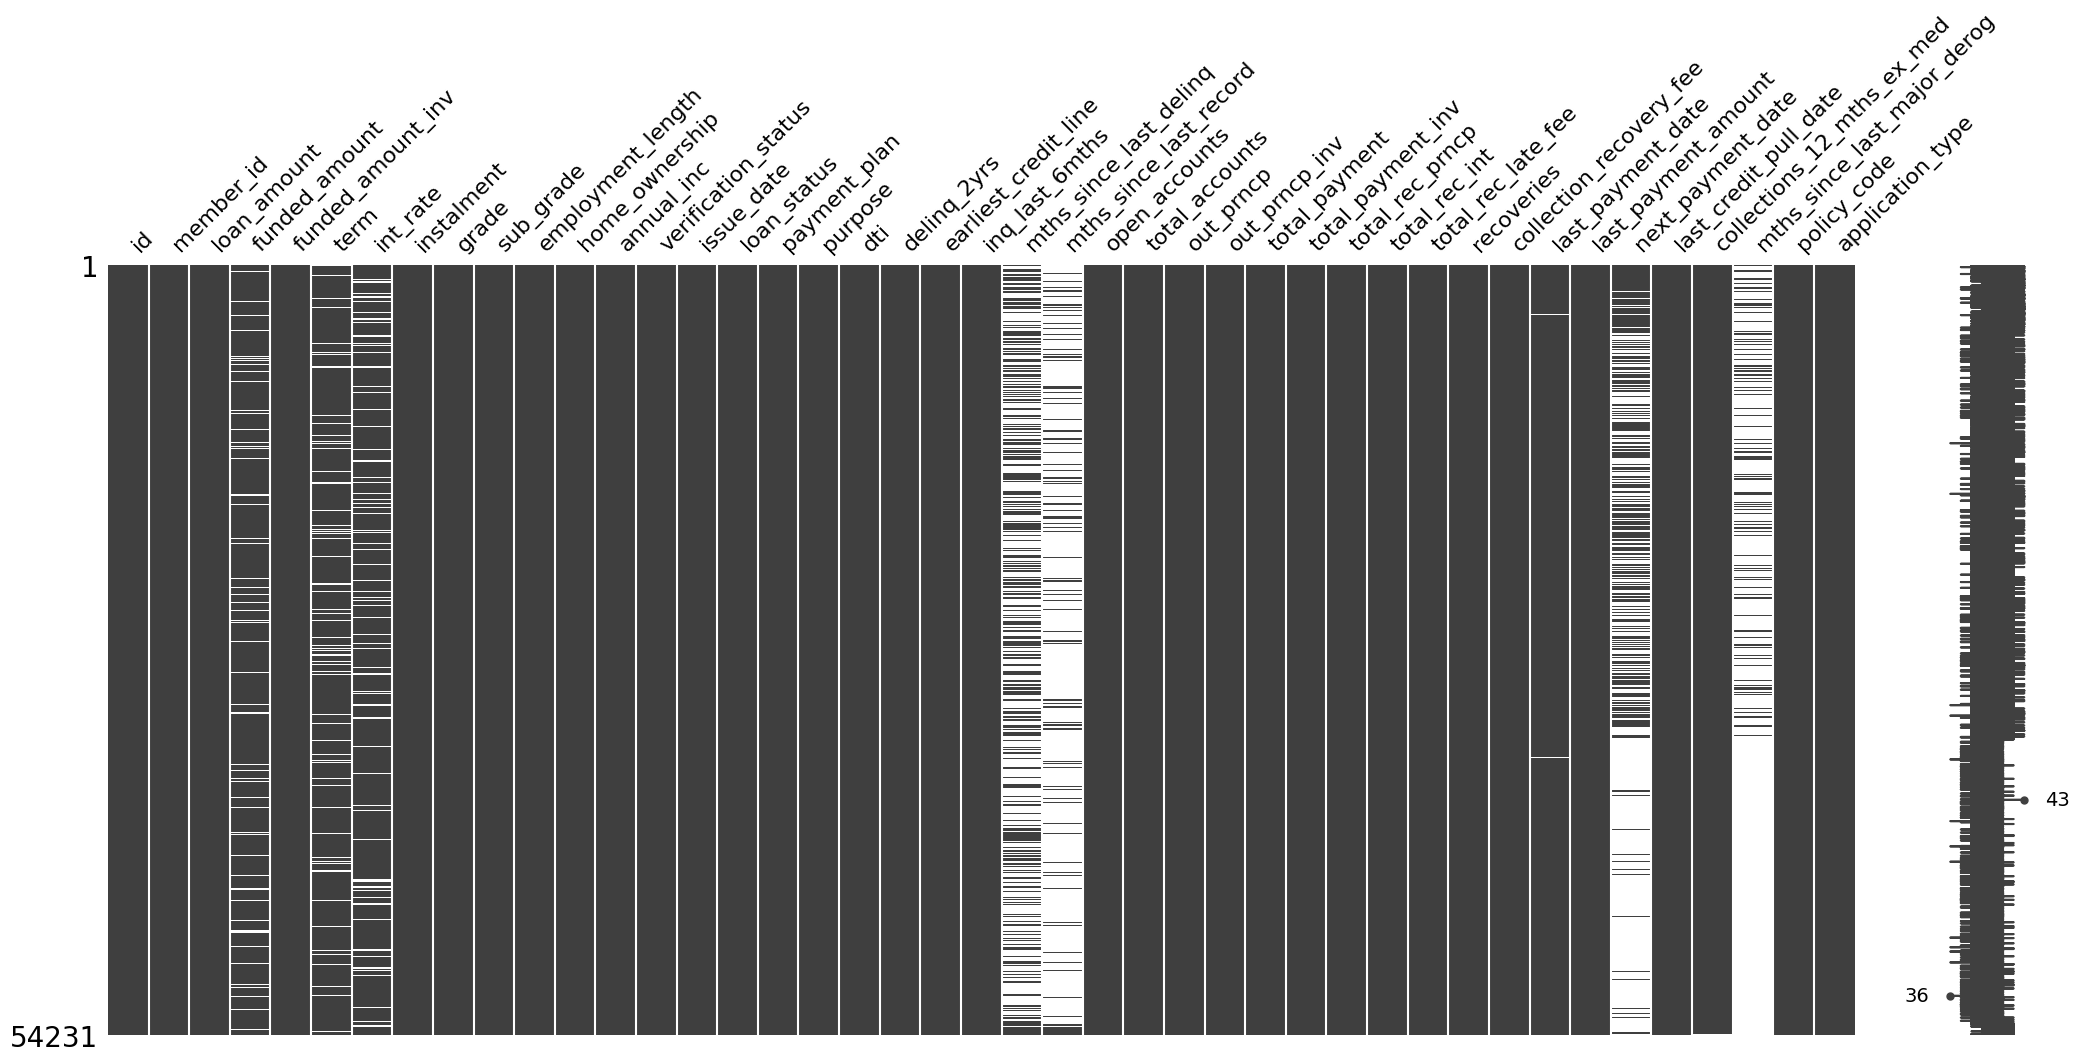

In [9]:
import missingno as msno

# Creates a matrix visualization of missing values in a DataFrame 
msno.matrix(df)

<Axes: >

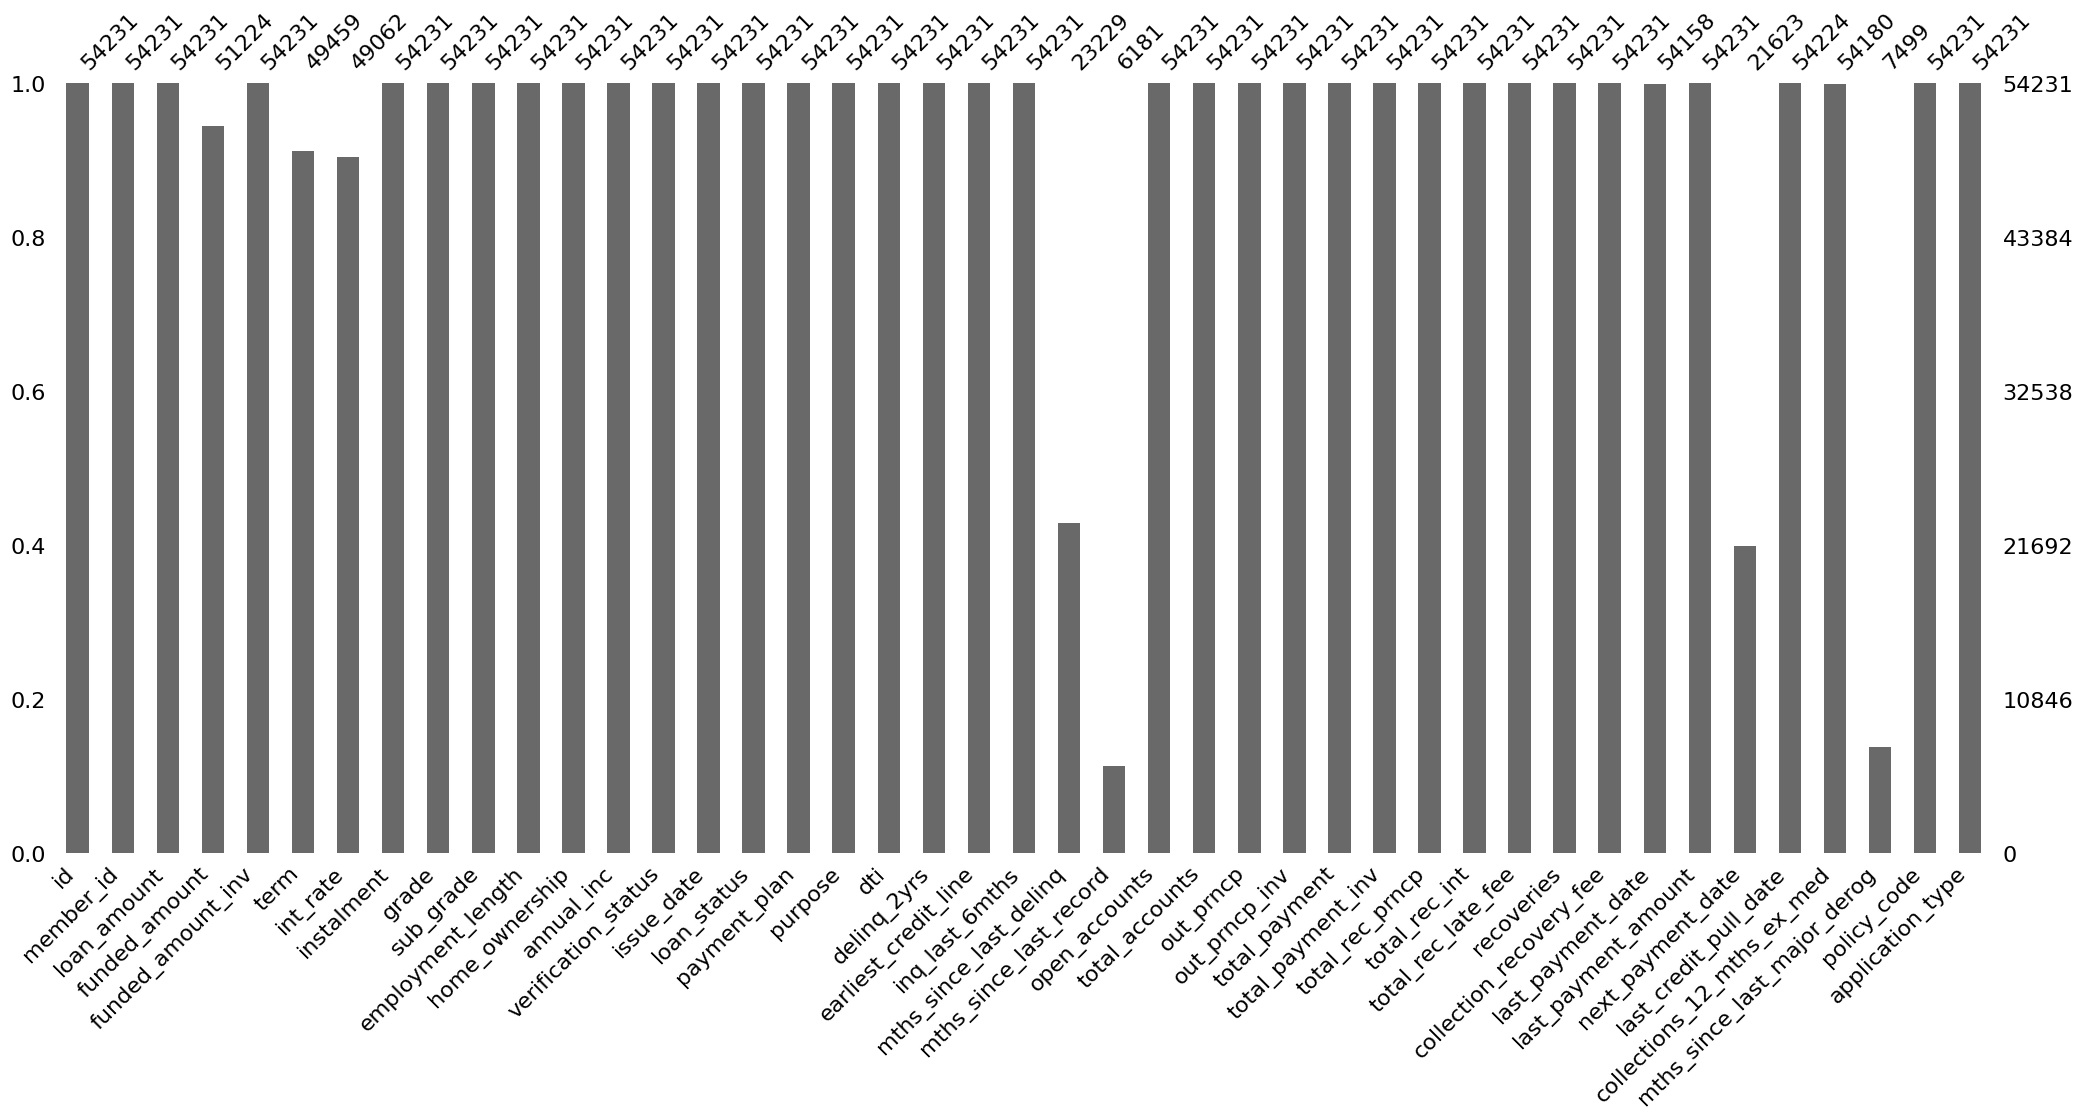

In [10]:
msno.bar(df)

In [11]:
# The percentage of missing values/ null
df_info.get_missing_values()

,column_name,percent_missing
funded_amount,funded_amount,5.54
term,term,8.80
int_rate,int_rate,9.53
mths_since_last_delinq,mths_since_last_delinq,57.17
mths_since_last_record,mths_since_last_record,88.60
last_payment_date,last_payment_date,0.13
next_payment_date,next_payment_date,60.13
last_credit_pull_date,last_credit_pull_date,0.01
collections_12_mths_ex_med,collections_12_mths_ex_med,0.09
mths_since_last_major_derog,mths_since_last_major_derog,86.17


As you can see the percentage of missing values in:
- mths_since_last_delinq
- mths_since_last_record
- next_payment_date
- mths_since_last_major_derog	

are too great so it is best to drop these columns 

In [12]:
transformer.drop_column(["mths_since_last_major_derog", "next_payment_date",
                     "mths_since_last_record", "mths_since_last_delinq"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          54231 non-null  int64         
 1   member_id                   54231 non-null  int64         
 2   loan_amount                 54231 non-null  int64         
 3   funded_amount               51224 non-null  float64       
 4   funded_amount_inv           54231 non-null  float64       
 5   term                        49459 non-null  float64       
 6   int_rate                    49062 non-null  float64       
 7   instalment                  54231 non-null  float64       
 8   grade                       54231 non-null  category      
 9   sub_grade                   54231 non-null  category      
 10  employment_length           54231 non-null  int64         
 11  home_ownership              54231 non-null  category  

Now in the case of these:
- Last_credit_pull_date
- collections_12_mths_ex_med
- last_payment_date

We could drop these rows, however it's a minor amount of rows affected so we can either drop these rows or impute the columns. 

Now we need to determine whether we're going to impute these columns with either the mean or median. We'll first need to determine if these columns are skewed or not. If the columns are skewed then it will be a bad idea to impute with the mean and so we can use the median.

From observation `loan_amount` and `funded_amount` columns essentially have the same values everywhere there isn't null in funded_amount. So we could either impute the funded_amount column or we could just set it to the value of the loan_amount column, for now we'll go with imputing. I would drop the datetime rows here as well since it will be too hard to determine the next payment date. This leaves us with just `term` and `int_rate`.


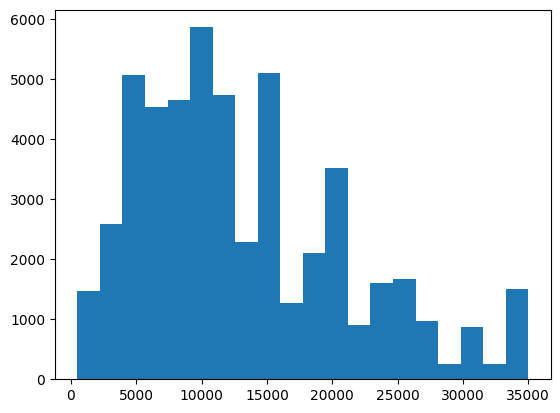

In [14]:
# histogram with 20 bins
df_plot.histogram('funded_amount', 20)

In [15]:
# Imputing funded_amount with loan_amount
df["funded_amount"] = df["funded_amount"].fillna(df["loan_amount"])

# Based on observing term and the fact that there are two prevelant choices so I will use mode (36)
# Calculate the mode of the 'term' column
term_mode = df["term"].mode().iloc[0]

# Fill missing values in the 'term' column with the mode
df["term"].fillna(term_mode, inplace=True)

# drops empty rows in these columns
df = df.dropna(subset=['last_payment_date', 'last_credit_pull_date',
       'collections_12_mths_ex_med'])

In [16]:
df_info = DataFrameInfo(df)
df_plot = Plotter(df)

In [17]:

df_info.get_missing_values()

,column_name,percent_missing
int_rate,int_rate,9.54


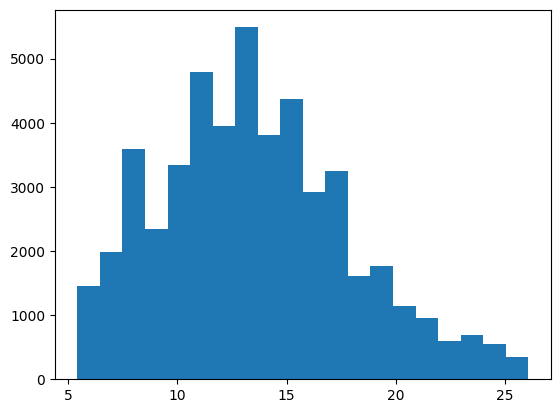

0.411540039874641


In [18]:
df_plot = Plotter(df)
# histogram with 20 bins
df_plot.histogram('int_rate', 20)

skew_df = df['int_rate'].skew()
print(skew_df)

In [19]:
# int_rate is under threshold, So we can mean for threshold 
# df = transformer.impute_columns('int_rate', 'median')

# df['int_rate'].head(50)
df['int_rate'].mean()
df["int_rate"] = df["int_rate"].fillna(df["int_rate"].mean())
df['int_rate'].head(50)

/var/folders/z2/43g_cq3x0519528c7x3g3v040000gn/T/ipykernel_2005/3438639269.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["int_rate"] = df["int_rate"].fillna(df["int_rate"].mean())


0      7.490000
1      6.990000
2      7.490000
3     14.310000
4      6.030000
5     11.440000
6     21.990000
7     19.990000
8     12.990000
9      8.190000
10     8.190000
11    10.490000
12    12.390000
13     6.990000
14    13.660000
15    13.507936
16     8.190000
17    13.660000
18    12.390000
19    13.507936
20     6.990000
21    22.990000
22    15.990000
23    19.990000
24    12.990000
25    24.990000
26    19.990000
27     9.490000
28     6.990000
29    21.990000
30    15.590000
31    10.490000
32    14.310000
33    19.240000
34     6.490000
35    16.490000
36    12.390000
37    19.240000
38    17.140000
39    14.310000
40    18.540000
41     8.190000
42     8.670000
43    12.990000
44    12.390000
45    15.590000
46    18.540000
47    11.440000
48    18.540000
49    15.590000
Name: int_rate, dtype: float64

In [20]:
df_info.get_missing_values()

,column_name,percent_missing


As you can see we now have no missing values

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 54100 entries, 0 to 54227
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          54100 non-null  int64         
 1   member_id                   54100 non-null  int64         
 2   loan_amount                 54100 non-null  int64         
 3   funded_amount               54100 non-null  float64       
 4   funded_amount_inv           54100 non-null  float64       
 5   term                        54100 non-null  float64       
 6   int_rate                    54100 non-null  float64       
 7   instalment                  54100 non-null  float64       
 8   grade                       54100 non-null  category      
 9   sub_grade                   54100 non-null  category      
 10  employment_length           54100 non-null  int64         
 11  home_ownership              54100 non-null  category      


### Skewness

Now we be analysing the skewness the best way to represent skewness is through histogram or using pandas skew method.

[[<Axes: title={'center': 'id'}> <Axes: title={'center': 'member_id'}>
  <Axes: title={'center': 'loan_amount'}>
  <Axes: title={'center': 'funded_amount'}>
  <Axes: title={'center': 'funded_amount_inv'}>
  <Axes: title={'center': 'term'}>]
 [<Axes: title={'center': 'int_rate'}>
  <Axes: title={'center': 'instalment'}>
  <Axes: title={'center': 'employment_length'}>
  <Axes: title={'center': 'annual_inc'}>
  <Axes: title={'center': 'issue_date'}>
  <Axes: title={'center': 'payment_plan'}>]
 [<Axes: title={'center': 'dti'}> <Axes: title={'center': 'delinq_2yrs'}>
  <Axes: title={'center': 'earliest_credit_line'}>
  <Axes: title={'center': 'inq_last_6mths'}>
  <Axes: title={'center': 'open_accounts'}>
  <Axes: title={'center': 'total_accounts'}>]
 [<Axes: title={'center': 'out_prncp'}>
  <Axes: title={'center': 'out_prncp_inv'}>
  <Axes: title={'center': 'total_payment'}>
  <Axes: title={'center': 'total_payment_inv'}>
  <Axes: title={'center': 'total_rec_prncp'}>
  <Axes: title={'center

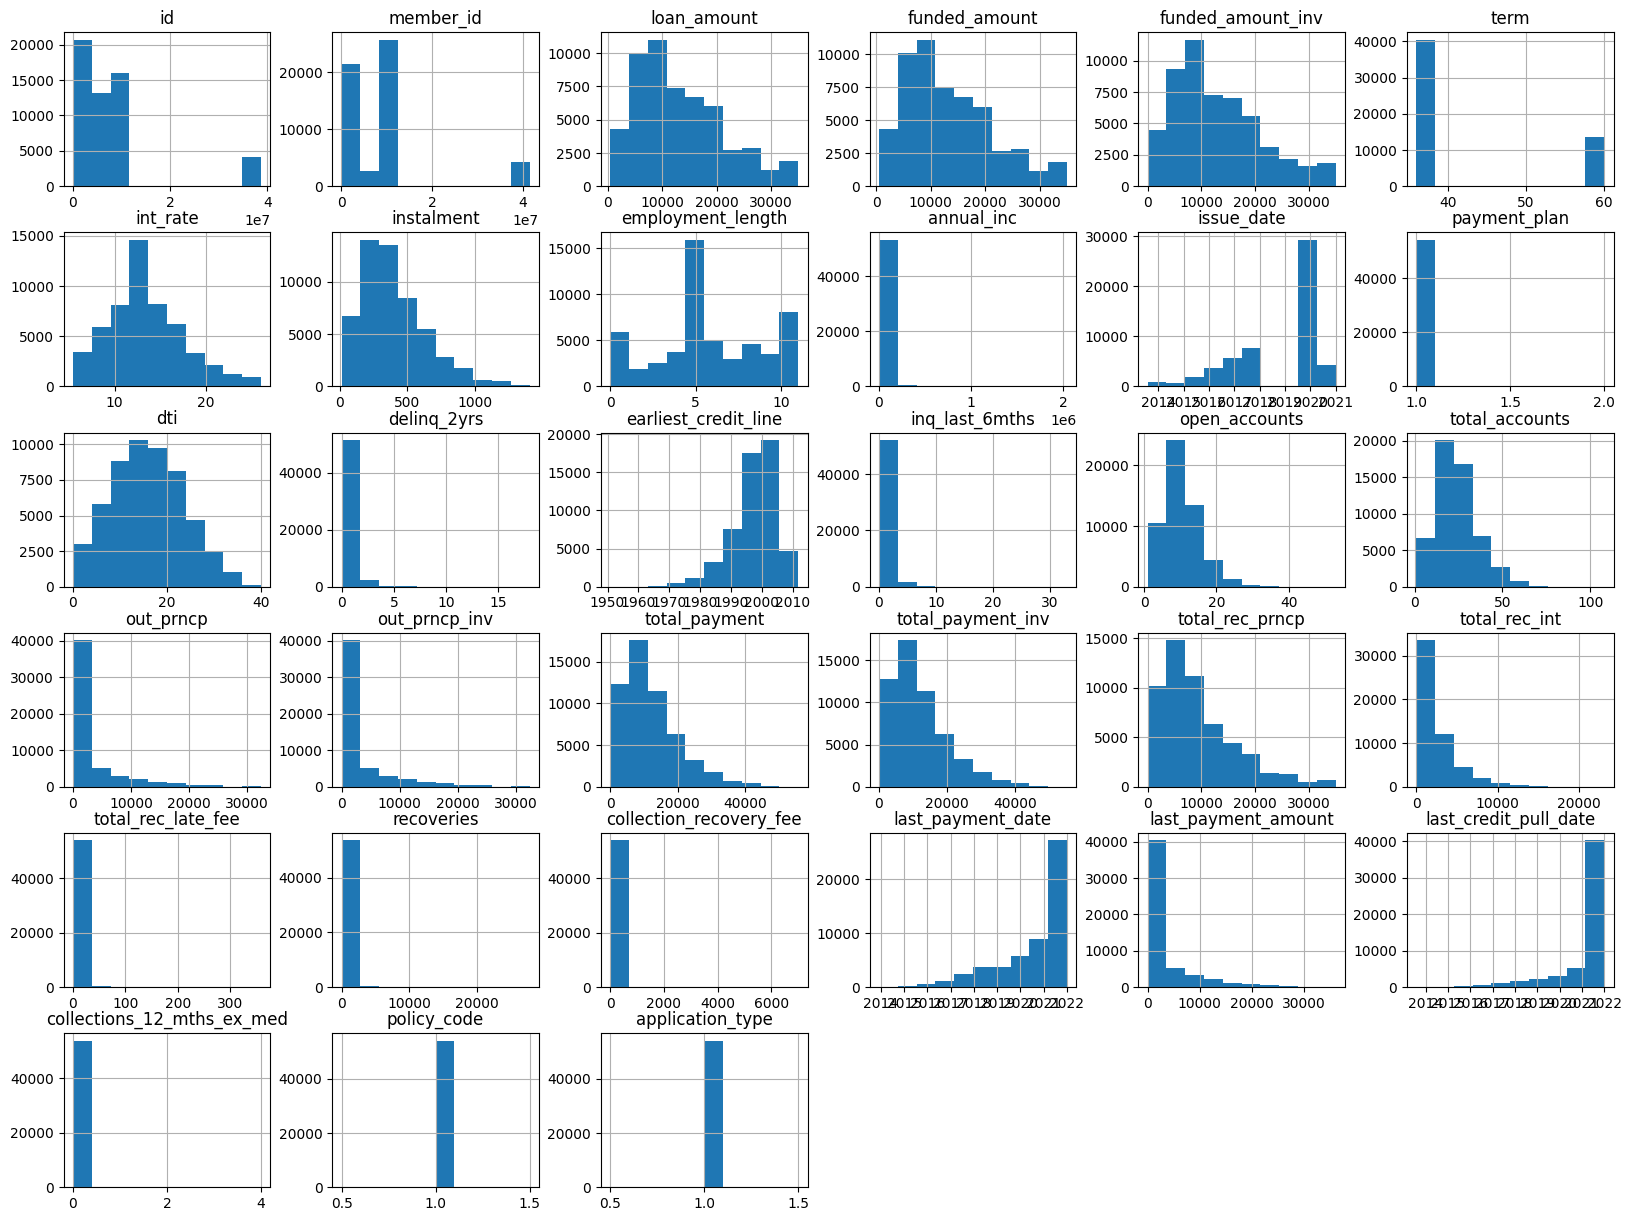

In [22]:
print(df.hist(figsize=(20,15)))

From the histograms above we can conclude that the following variables have a positive skew:

- loan_amount
- funded_amount
- funded_amount_inv
- instalment
- open_accounts
- total accounts
- out_prncp
- out_prncp_inv
- total_payment
- total_payment_inv
- total_rec_prncp
- total_rec_int
- last_payment_amount



In [23]:
df[['loan_amount', 'funded_amount', 'funded_amount_inv', 'instalment', 'open_accounts', 'total_accounts','out_prncp','out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']].skew(numeric_only=False)

loan_amount            0.804312
funded_amount          0.819681
funded_amount_inv      0.814251
instalment             0.996150
open_accounts          1.059493
total_accounts         0.780083
out_prncp              2.352526
out_prncp_inv          2.352946
total_payment          1.269266
total_payment_inv      1.258474
total_rec_prncp        1.262007
total_rec_int          2.203625
last_payment_amount    2.496079
dtype: float64

In [24]:
from skew_transformation import SkewTransform



In [25]:
transformed_df1 = SkewTransform(df)

selected_columns = [
    "annual_inc",
    "payment_plan",
    "delinq_2yrs",
    "inq_last_6mths",
    "open_accounts",
    "out_prncp",
    "out_prncp_inv",
    "total_payment",
    "total_payment_inv",
    "total_rec_prncp",
    "total_rec_int",
    "total_rec_late_fee",
    "recoveries",
    "collection_recovery_fee",
    "last_payment_amount",
    "collections_12_mths_ex_med"
    
]



# transformed_df1.yeojohnson_transform('annual_inc')
# transformed_df1.yeojohnson_transform('payment_plan')
# transformed_df1.yeojohnson_transform('delinq_2yrs')
# transformed_df1.yeojohnson_transform('inq_last_6mths')
# transformed_df1.yeojohnson_transform('open_accounts')
# transformed_df1.yeojohnson_transform('out_prncp')
# transformed_df1.yeojohnson_transform('out_prncp_inv')
# transformed_df1.yeojohnson_transform('total_payment')
# transformed_df1.yeojohnson_transform('total_payment_inv')
# transformed_df1.yeojohnson_transform('total_rec_prncp')
# transformed_df1.yeojohnson_transform('total_rec_int')
# transformed_df1.yeojohnson_transform('recoveries')
# transformed_df1.yeojohnson_transform('total_rec_late_fee')




transformed_df1.yeojohnson_transform('loan_amount')
transformed_df1.yeojohnson_transform('funded_amount')
transformed_df1.yeojohnson_transform('funded_amount_inv')
transformed_df1.yeojohnson_transform('instalment')
transformed_df1.yeojohnson_transform('open_accounts')
transformed_df1.yeojohnson_transform('total_accounts')
transformed_df1.yeojohnson_transform('out_prncp')
transformed_df1.yeojohnson_transform('out_prncp_inv')
transformed_df1.yeojohnson_transform('total_payment')
transformed_df1.yeojohnson_transform('total_payment_inv')
transformed_df1.yeojohnson_transform('total_rec_prncp')
transformed_df1.yeojohnson_transform('total_rec_int')
transformed_df1.yeojohnson_transform('last_payment_amount')




/Users/hameedroleola/EDA_Loans/EDA-Customer-Loans/skew_transformation.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[column] = yeojohnson_transform


In [26]:
# skew_df = transformed_df.skew(numeric_only=True).to_frame().reset_index()
# skew_df = skew_df.loc[abs(skew_df[0]) >= 1]
# skew_df
#df.info()
df['annual_inc'].head(20)
df

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,68.035129,66.693838,118.808946,36.0,7.49,16.117665,A,A4,...,10.799539,0.000000,0.0,0.0,2022-01-01,4.910558,2022-01-01,0.0,1,1
1,38656203,41440010,82.041964,80.313841,148.884050,36.0,6.99,19.560310,A,A3,...,12.024962,0.000000,0.0,0.0,2022-01-01,5.293713,2022-01-01,0.0,1,1
2,38656154,41439961,88.131721,86.229317,162.331777,36.0,7.49,21.126551,A,A4,...,12.159244,0.000000,0.0,0.0,2021-10-01,7.763081,2021-10-01,0.0,1,1
3,38656128,41439934,86.041427,84.199231,157.691853,36.0,14.31,21.405263,C,C4,...,12.576487,0.000000,0.0,0.0,2021-06-01,7.815112,2021-06-01,0.0,1,1
4,38656121,41439927,86.041427,84.199231,157.691853,36.0,6.03,20.437849,A,A1,...,11.960769,0.000000,0.0,0.0,2022-01-01,5.380851,2022-01-01,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54199,55521,107577,NaN,NaN,NaN,36.0,16.08,NaN,F,F2,...,NaN,0.000000,0.0,0.0,2016-03-01,NaN,2016-03-01,0.0,1,1
54203,185352,105254,NaN,NaN,NaN,36.0,9.64,NaN,B,B4,...,NaN,0.000000,0.0,0.0,2016-12-01,NaN,2016-12-01,0.0,1,1
54204,122637,104675,NaN,NaN,NaN,36.0,7.75,NaN,A,A3,...,NaN,0.000000,0.0,0.0,2016-09-01,NaN,2016-08-01,0.0,1,1
54221,395632,91027,NaN,NaN,NaN,36.0,13.16,NaN,C,C3,...,NaN,0.000000,0.0,0.0,2016-10-01,NaN,2021-04-01,0.0,1,1


In [27]:
# transformed_df



In [28]:
# from scipy import stats

# transformed_df

In [29]:
skew_df = df.skew(numeric_only=True).to_frame().reset_index()
skew_df = skew_df.loc[abs(skew_df[0]) >= 0.5]  # Change the threshold as needed
skew_df

,index,0
0,id,2.369415
1,member_id,2.204549
5,term,1.146332
9,annual_inc,8.735737
10,payment_plan,232.594067
12,delinq_2yrs,5.318818
13,inq_last_6mths,3.243836
16,out_prncp,0.528308
17,out_prncp_inv,0.528326
22,total_rec_late_fee,13.258472


array([[<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'funded_amount'}>,
        <Axes: title={'center': 'funded_amount_inv'}>,
        <Axes: title={'center': 'instalment'}>],
       [<Axes: title={'center': 'open_accounts'}>,
        <Axes: title={'center': 'total_accounts'}>,
        <Axes: title={'center': 'out_prncp'}>,
        <Axes: title={'center': 'out_prncp_inv'}>],
       [<Axes: title={'center': 'total_payment'}>,
        <Axes: title={'center': 'total_payment_inv'}>,
        <Axes: title={'center': 'total_rec_prncp'}>,
        <Axes: title={'center': 'total_rec_int'}>],
       [<Axes: title={'center': 'last_payment_amount'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

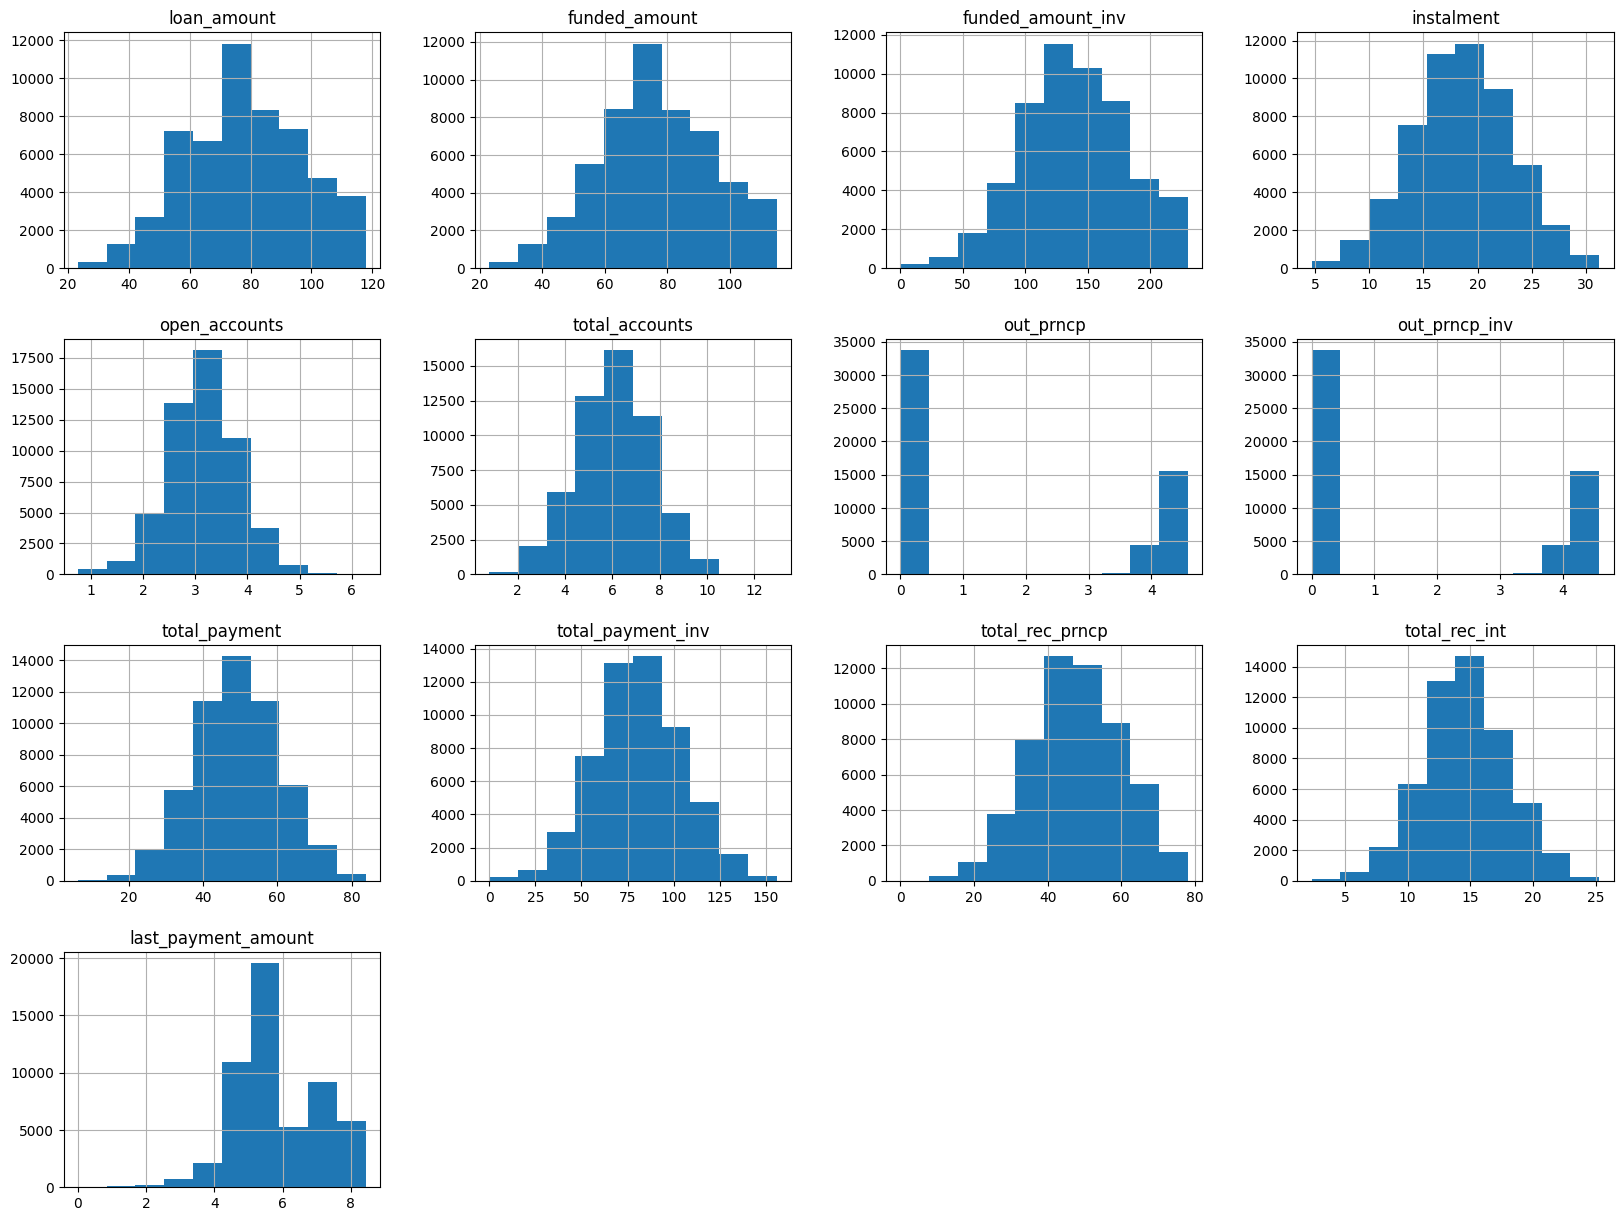

In [30]:
df[['loan_amount', 'funded_amount', 'funded_amount_inv', 'instalment',
         'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 
        'total_payment', 'total_payment_inv', 'total_rec_prncp',
        'total_rec_int', 'last_payment_amount']].hist(figsize=(20,15))

In [31]:
df[['loan_amount', 'funded_amount', 'funded_amount_inv', 'instalment', 'open_accounts', 'total_accounts','out_prncp','out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']].skew(numeric_only=False)

loan_amount           -0.042782
funded_amount         -0.040992
funded_amount_inv     -0.035047
instalment            -0.020439
open_accounts          0.001399
total_accounts        -0.012742
out_prncp              0.528308
out_prncp_inv          0.528326
total_payment         -0.014033
total_payment_inv      0.005727
total_rec_prncp       -0.017952
total_rec_int          0.001459
last_payment_amount    0.002584
dtype: float64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54100 entries, 0 to 54227
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          54100 non-null  int64         
 1   member_id                   54100 non-null  int64         
 2   loan_amount                 54020 non-null  float64       
 3   funded_amount               54020 non-null  float64       
 4   funded_amount_inv           54020 non-null  float64       
 5   term                        54100 non-null  float64       
 6   int_rate                    54100 non-null  float64       
 7   instalment                  54020 non-null  float64       
 8   grade                       54100 non-null  category      
 9   sub_grade                   54100 non-null  category      
 10  employment_length           54100 non-null  int64         
 11  home_ownership              54100 non-null  category      


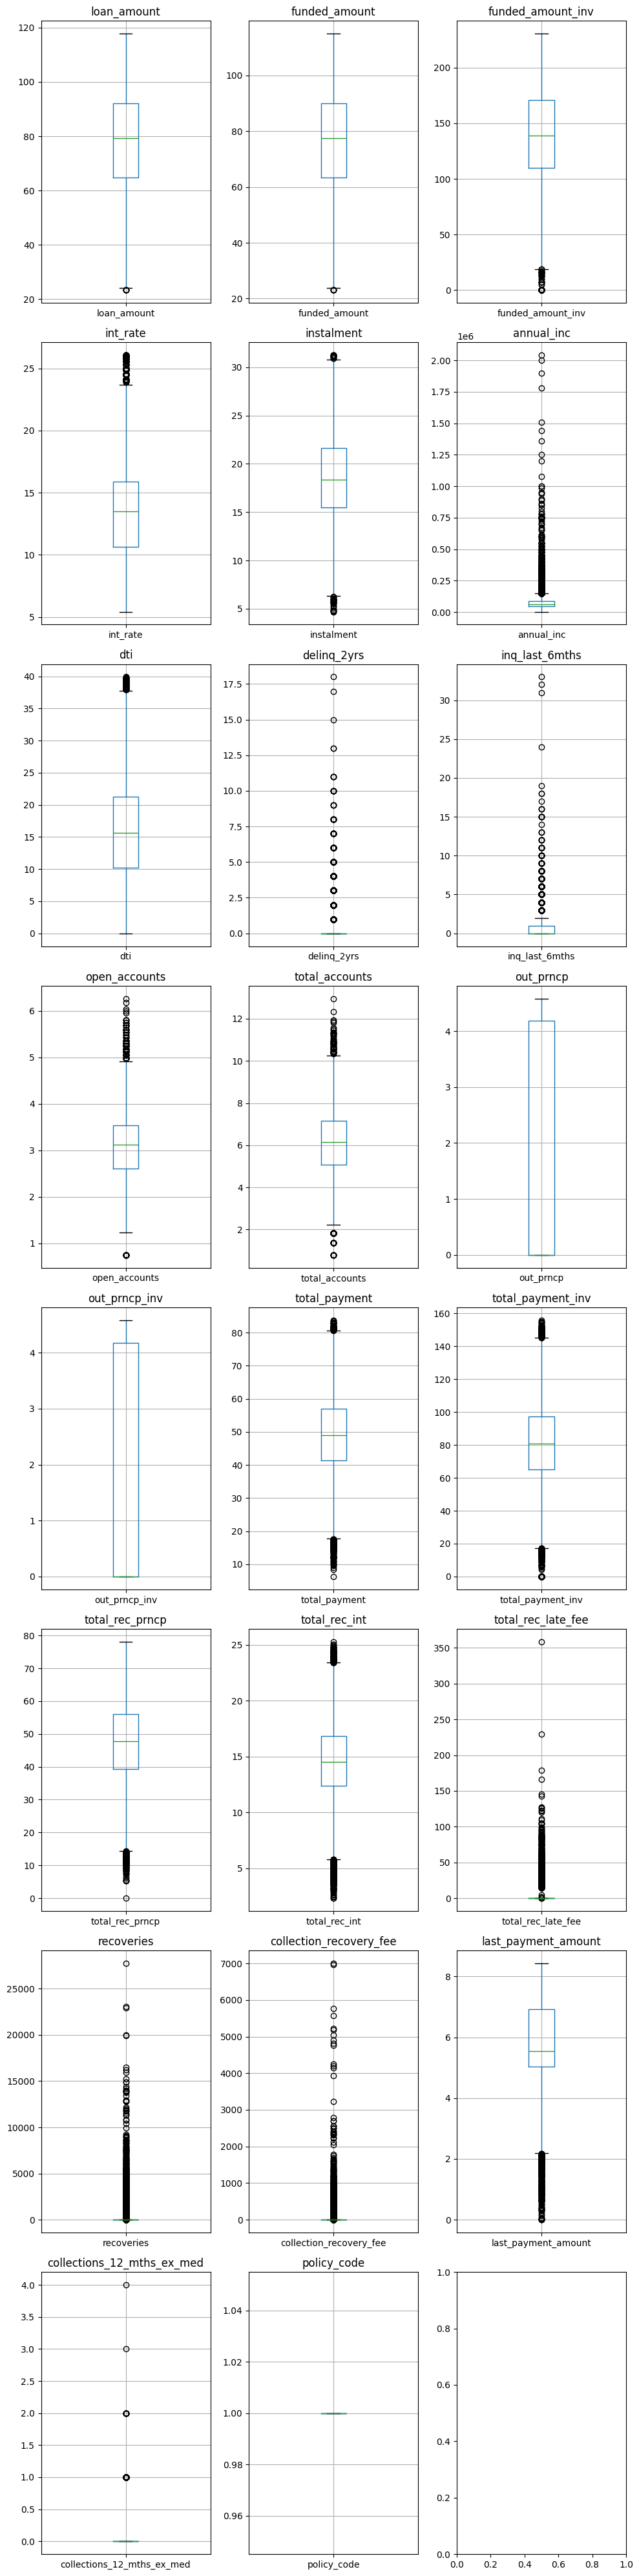

In [33]:
import matplotlib.pyplot as plt

columns = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_payment_amount', 'collections_12_mths_ex_med', 'policy_code']


fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(10, 40))
axes = axes.flatten()

for idx, column in enumerate(columns):
    df.boxplot(column=column, ax=axes[idx])
    axes[idx].set_title(column)

plt.tight_layout()
plt.show()


In [34]:
import pandas as pd


def remove_outliers_for_column(df, column, threshold=3):
    """
    Remove outliers from a specific column in a DataFrame using Z-scores.

    Parameters:
    - df: DataFrame
    - column: Column name to consider
    - threshold: Z-score threshold for outlier removal

    Returns:
    - DataFrame without outliers in the specified column
    """
    # Calculate Z-scores for the specified column
    z_scores = (df[column] - df[column].mean()) / df[column].std()

    # Identify outliers based on the Z-score threshold
    outliers = z_scores.abs() > threshold

    # Remove outliers from the DataFrame
    df_outliers = df[~outliers]

    return df_outliers

df_outliers = remove_outliers_for_column(df, column='total_accounts')
df_outliers = remove_outliers_for_column(df, column='inq_last_6mths')



In [35]:
skew_df = df_outliers[["total_accounts", "inq_last_6mths"]].skew(numeric_only=True).to_frame().reset_index()
#skew_df = skew_df.loc[abs(skew_df[0]) >= 1]
skew_df


,index,0
0,total_accounts,-0.007269
1,inq_last_6mths,1.212420


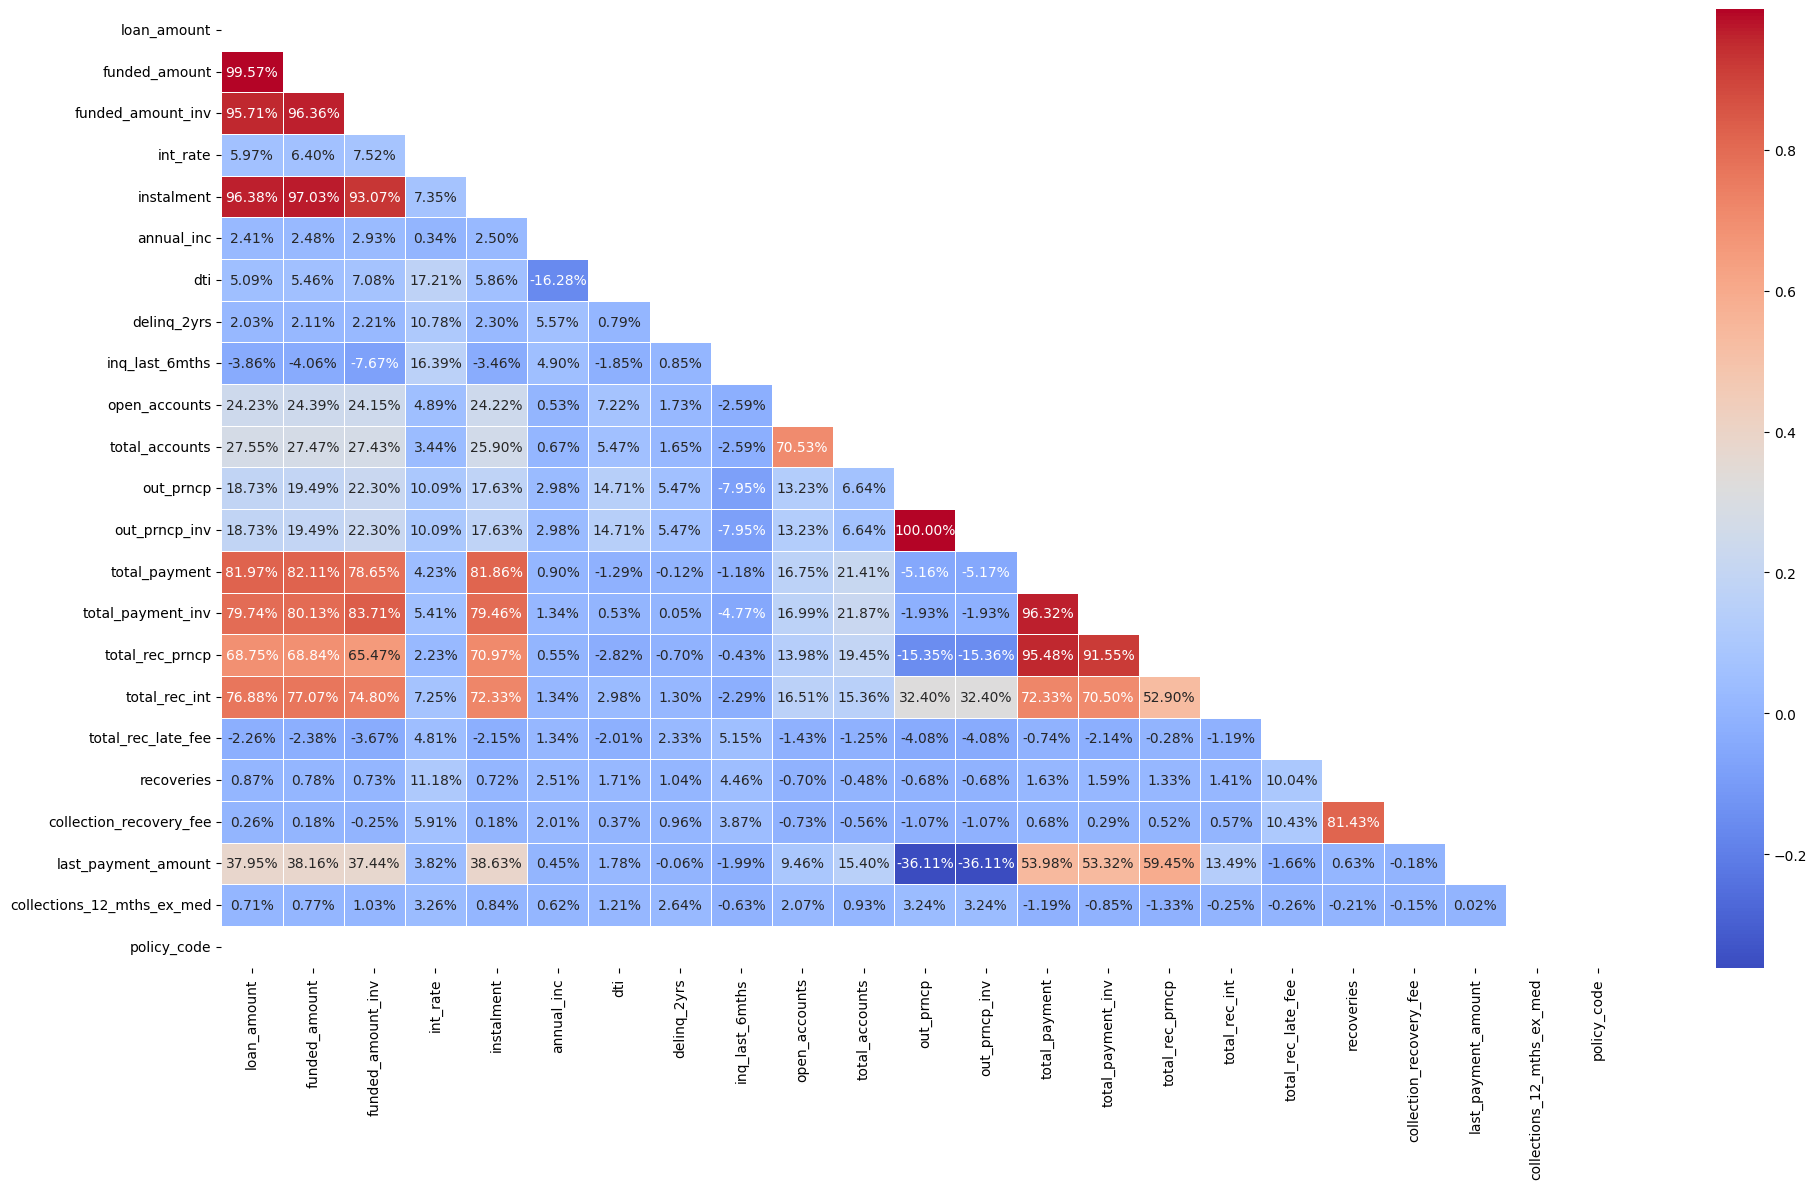

In [36]:

import numpy as np
import seaborn as sns

f, ax = plt.subplots(figsize=(20, 12))
only_numeric_df = df[list(columns)]
corr_matrix = only_numeric_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix))
corr = sns.heatmap(
    data=corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2%",
    linewidth=.5,
    mask=mask,
    axes=ax
)

plt.tight_layout()
plt.show()



In [38]:
df = df.drop(['id', 'total_rec_prncp'], axis=1)
